In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from antsTSP import AntColonyTSP
from geneticTSP import GeneticTSP
from matplotlib.animation import FuncAnimation

# Генерування кола

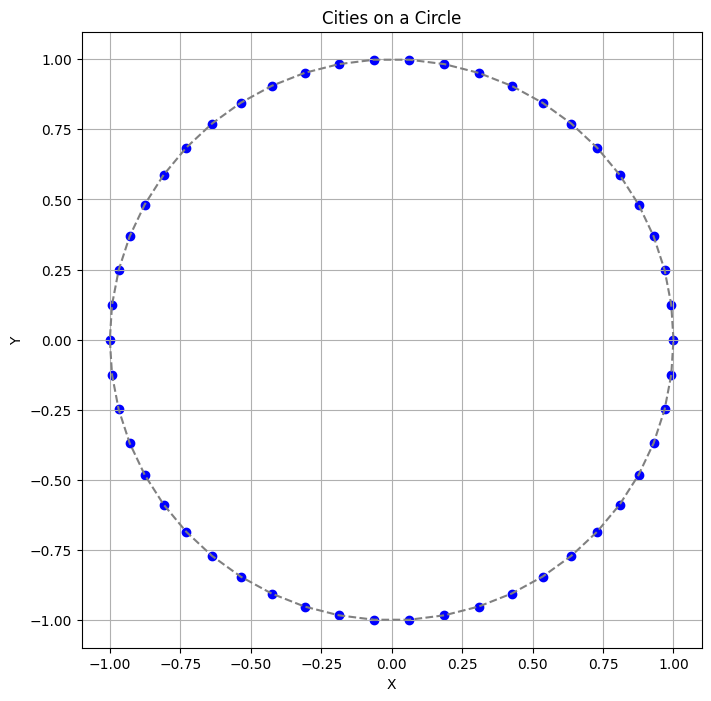

In [2]:
def generate_circle(num_points, radius=1, center=(0, 0)):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)) for angle in angles
    ]
    return points

def plot_circle(points):
    x, y = zip(*points)
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, color='blue', label='Cities')
    plt.plot(list(x) + [x[0]], list(y) + [y[0]], linestyle='--', color='gray')
    plt.title('Cities on a Circle')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

points = generate_circle(50)
plot_circle(points)

# Функція генерування графіків

In [46]:
def plot_route(points, best_route, best_lenghts):
        ordered_points = [points[i] for i in best_route] + [points[best_route[0]]]
        x, y = zip(*ordered_points)
        _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        ax1.plot(x, y, marker='o', linestyle='-', color='blue')
        ax1.set_title("Optimal Route")
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        ax1.grid(True)

        ax2.plot(best_lenghts)
        ax2.set_title("Best Length Over Generations")
        ax2.set_xlabel("Generation")
        ax2.set_ylabel("Best Length")
        ax2.grid(True)

        plt.show()

# Запуск алгоритмів для кола

In [18]:
ant_colony_results = {}
genetic_tsp_results = {}

for i in [30, 50, 100, 200]:
    points = generate_circle(i)

    best_route_ant_main, best_length_ant_main, best_routes_ant_main, best_lengths_ant_main = [], np.inf, [], []
    best_route_gen_main, best_length_gen_main, best_routes_gen_main, best_lengths_gen_main = [], np.inf, [], []

    for _ in range(3):  
        ant_colony = AntColonyTSP(points, num_ants=20, generations=100, alpha=1.0, beta=1.0, evaporation=0.5, Q=4)
        genetic_tsp = GeneticTSP(points, pop_size=100, generations=300, mutation_rate=0.1)

        best_route_ant, best_length_ant, best_routes_ant, best_lengths_ant = ant_colony.optimize()
        best_route_gen, best_length_gen, best_routes_gen, best_lengths_gen = genetic_tsp.optimize()

        if best_length_ant < best_length_ant_main:
            best_route_ant_main, best_length_ant_main = best_route_ant, best_length_ant
            best_routes_ant_main, best_lengths_ant_main = best_routes_ant, best_lengths_ant

    
        if best_length_gen < best_length_gen_main:
            best_route_gen_main, best_length_gen_main = best_route_gen, best_length_gen
            best_routes_gen_main, best_lengths_gen_main = best_routes_gen, best_lengths_gen

    ant_colony_results[i] = (best_route_ant_main, best_length_ant_main, best_routes_ant_main, best_lengths_ant_main)
    genetic_tsp_results[i] = (best_route_gen_main, best_length_gen_main, best_routes_gen_main, best_lengths_gen_main)
        


Generation 1: Best Length = 22.144104968845657
Generation 2: Best Length = 18.167965681937783
Generation 3: Best Length = 17.78428035687287
Generation 4: Best Length = 12.33043248710634
Generation 5: Best Length = 9.078680616340579
Generation 6: Best Length = 9.078680616340579
Generation 7: Best Length = 6.271707796059207
Generation 8: Best Length = 6.271707796059207
Generation 9: Best Length = 6.271707796059207
Generation 10: Best Length = 6.271707796059207
Generation 11: Best Length = 6.2717077960592045
Generation 12: Best Length = 6.2717077960592045
Generation 13: Best Length = 6.271707796059204
Generation 14: Best Length = 6.271707796059204
Generation 15: Best Length = 6.271707796059204
Generation 16: Best Length = 6.271707796059204
Generation 17: Best Length = 6.271707796059204
Generation 18: Best Length = 6.271707796059204
Generation 19: Best Length = 6.271707796059204
Generation 20: Best Length = 6.271707796059204
Generation 21: Best Length = 6.271707796059204
Generation 22: Bes

# Результати алгоритмів для кола

Довжина знайдено шляху  6.271707796059204


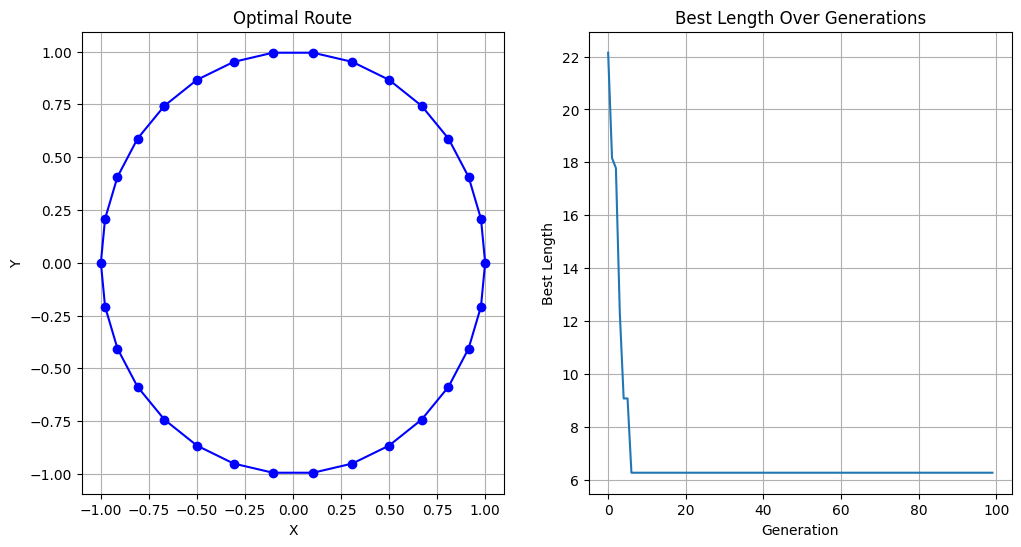

In [22]:
x = 30
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, ant_colony_results[x][0], ant_colony_results[x][3])

# plot_route(points, ant_colony_results[30][0], ant_colony_results[30][3][:100])

Довжина знайдено шляху  6.279051952931336


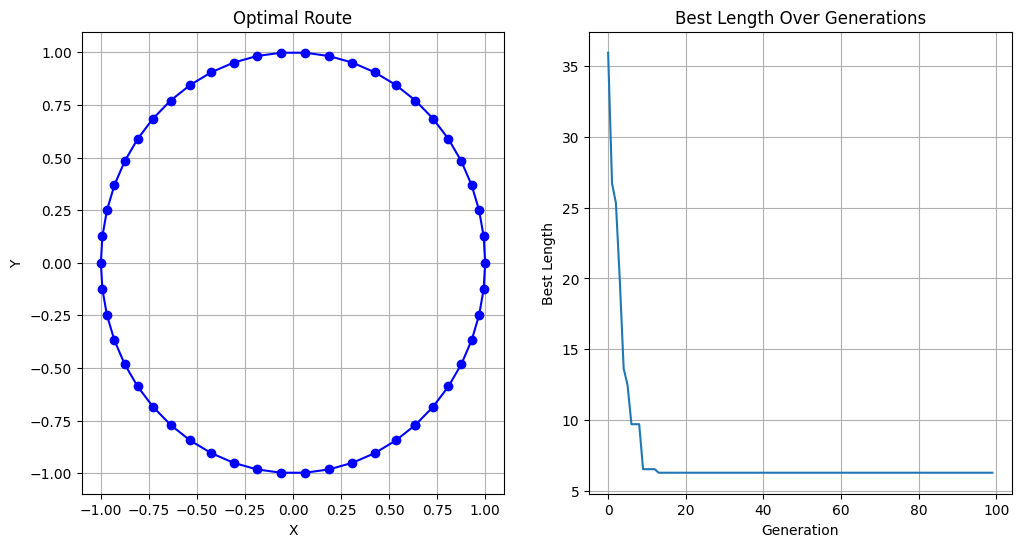

In [23]:
x = 50
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, ant_colony_results[x][0], ant_colony_results[x][3])

Довжина знайдено шляху  6.282151815625651


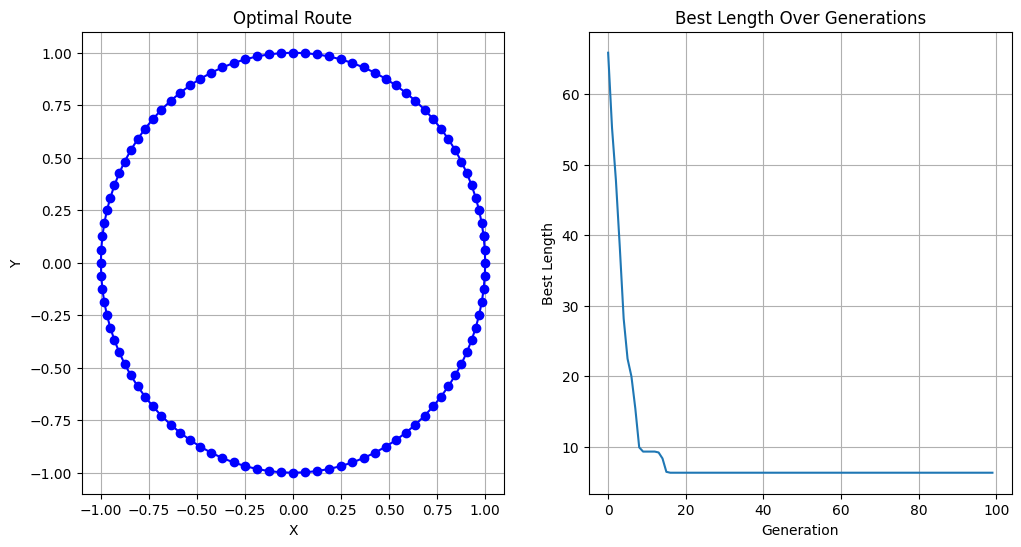

In [24]:
x = 100
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, ant_colony_results[x][0], ant_colony_results[x][3])

Довжина знайдено шляху  6.28292692472827


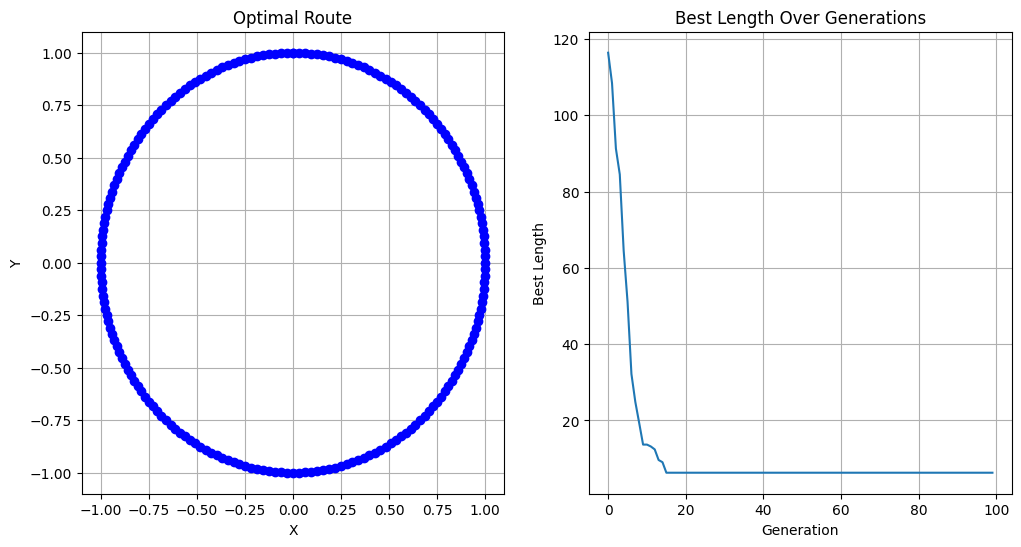

In [25]:
x = 200
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, ant_colony_results[x][0], ant_colony_results[x][3])

Довжина знайдено шляху  6.271707796059204


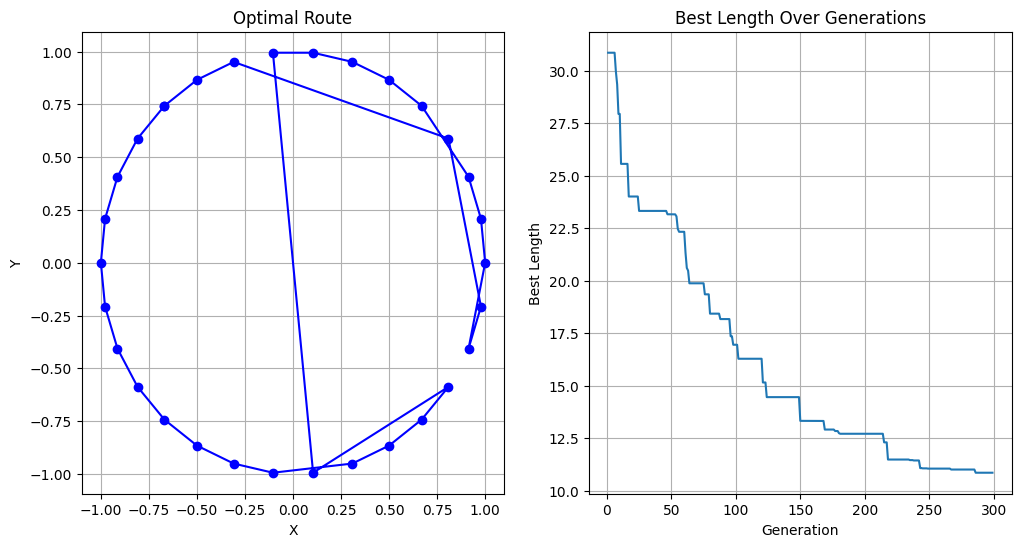

In [26]:
x = 30
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, genetic_tsp_results[x][0], genetic_tsp_results[x][3])

Довжина знайдено шляху  6.279051952931336


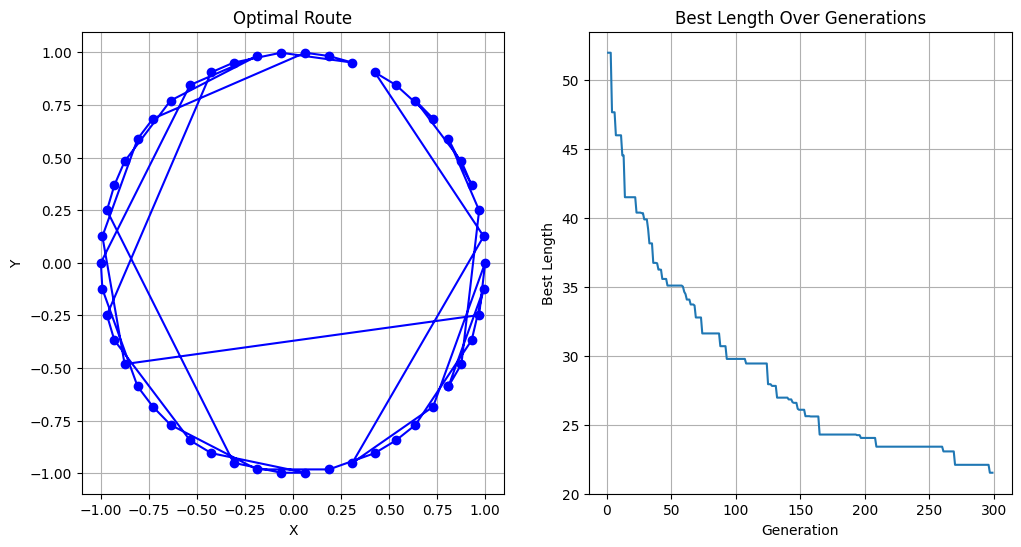

In [28]:
x = 50
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, genetic_tsp_results[x][0], genetic_tsp_results[x][3])

Довжина знайдено шляху  6.282151815625651


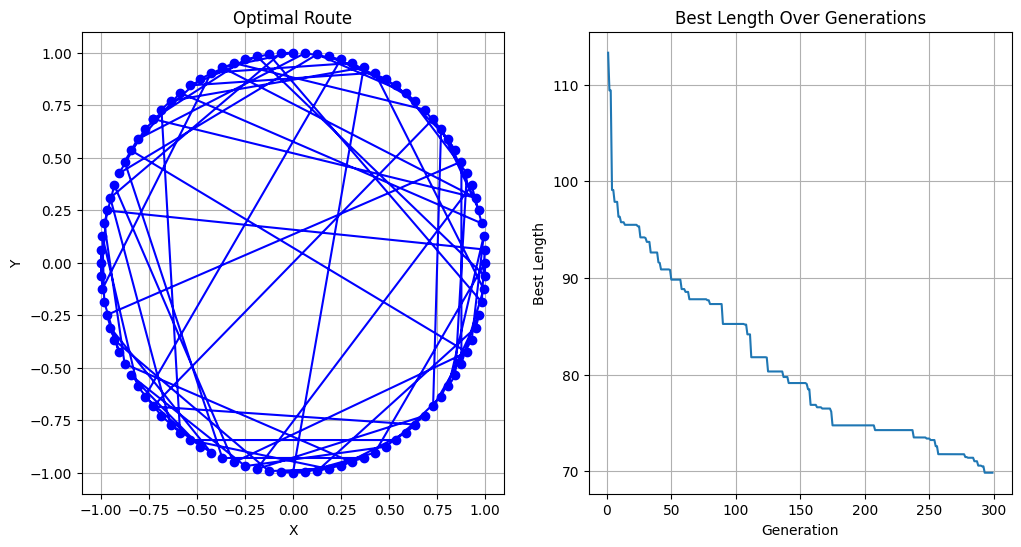

In [29]:
x = 100
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, genetic_tsp_results[x][0], genetic_tsp_results[x][3])

Довжина знайдено шляху  6.28292692472827


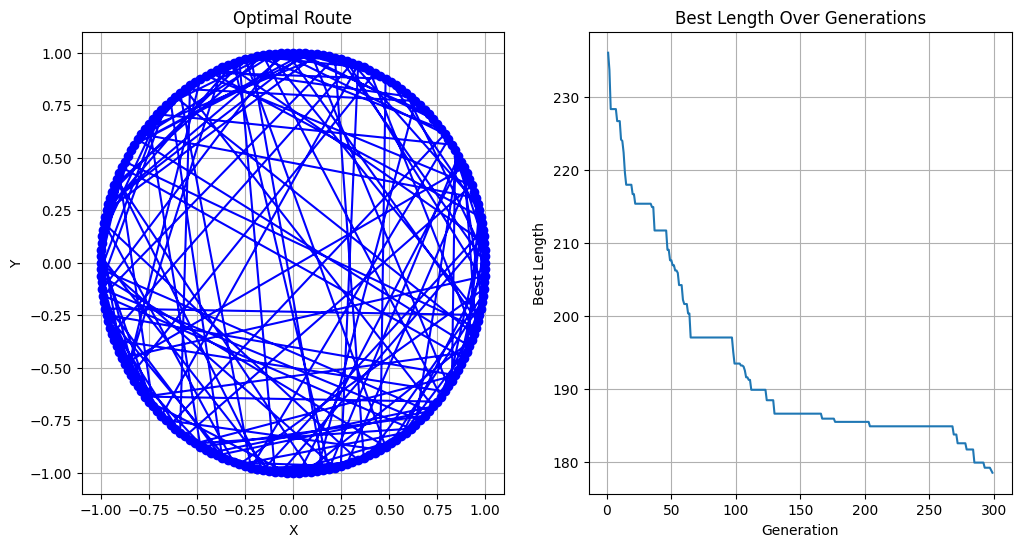

In [30]:
x = 200
points = generate_circle(x)
print("Довжина знайдено шляху ", ant_colony_results[x][1])
plot_route(points, genetic_tsp_results[x][0], genetic_tsp_results[x][3])

# Експеримент з великою кількістю генерацій для генетік алгоритму

Generation 1: Best Length = 108.48844288427566
Generation 2: Best Length = 108.48844288427566
Generation 3: Best Length = 108.48844288427566
Generation 4: Best Length = 106.86724939343095
Generation 5: Best Length = 106.86724939343095
Generation 6: Best Length = 106.37079222801329
Generation 7: Best Length = 106.37079222801329
Generation 8: Best Length = 102.50702666760591
Generation 9: Best Length = 102.50702666760591
Generation 10: Best Length = 102.3820646837517
Generation 11: Best Length = 102.23923257930473
Generation 12: Best Length = 102.03948853823523
Generation 13: Best Length = 102.03948853823523
Generation 14: Best Length = 101.4059246091049
Generation 15: Best Length = 99.04705896796648
Generation 16: Best Length = 99.04705896796648
Generation 17: Best Length = 98.3135479427559
Generation 18: Best Length = 98.21134807483772
Generation 19: Best Length = 97.27722580246457
Generation 20: Best Length = 96.028650431991
Generation 21: Best Length = 95.19293953886223
Generation 22

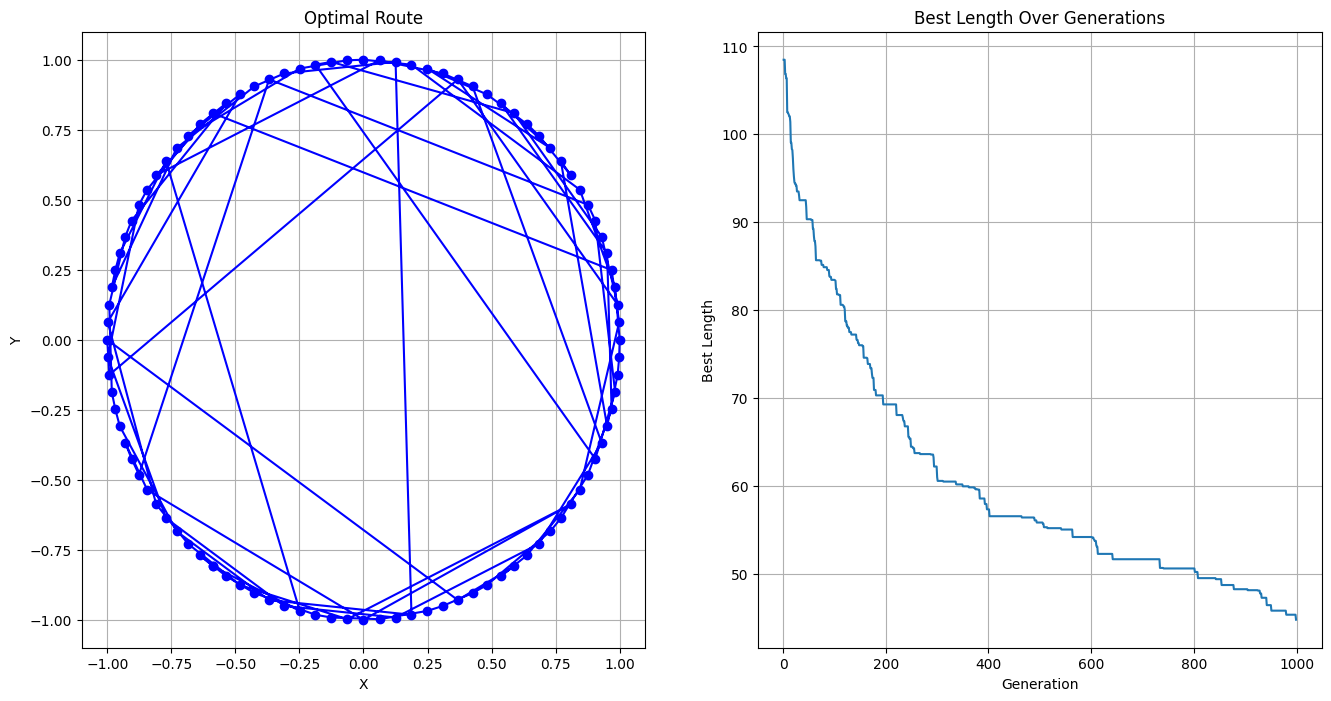

In [71]:
x = 100
points = generate_circle(x)
genetic_tsp = GeneticTSP(points, pop_size=100, generations=1000, mutation_rate=0.2)
best_route_gen_exp, best_length_gen_exp, best_routes_gen_exp, best_lengths_gen_exp = genetic_tsp.optimize()
print("Довжина знайдено шляху ", best_length_gen_exp)
plot_route(points, best_route_gen_exp, best_lengths_gen_exp)


Отже, збіжність генетік алгоритму досить довга навідміну від мурашинного

# Додаткове завдання

In [33]:
def read_tsp_file(filepath):
    """
    Зчитує координати міст з файлу формату .tsp
    """
    coordinates = []
    with open(filepath, 'r') as file:
        reading_coords = False
        for line in file:
            line = line.strip()
            # Початок блоку з координатами
            if line == "NODE_COORD_SECTION":
                reading_coords = True
                continue
            # Кінець блоку з координатами
            if line == "EOF":
                break
            if reading_coords:
                parts = line.split()
                if len(parts) >= 3:
                    try:
                        x, y = float(parts[1]), float(parts[2])
                        coordinates.append((x, y))
                    except ValueError:
                        continue
    return coordinates

In [34]:
file1_path = "xqg237.tsp"
file2_path = "pbk411.tsp"

In [35]:
coordinates1 = read_tsp_file(file1_path)
coordinates2 = read_tsp_file(file2_path)

In [42]:
best_route_ant_main_237, best_length_ant_main_237, best_routes_ant_main_237, best_lengths_ant_main_237 = [], np.inf, [], []
best_route_gen_main_237, best_length_gen_main_237, best_routes_gen_main_237, best_lengths_gen_main_237 = [], np.inf, [], []

for _ in range(3):  
    ant_colony = AntColonyTSP(coordinates1, num_ants=30, generations=100, alpha=1.0, beta=2.0, evaporation=0.5, Q=4)
    genetic_tsp = GeneticTSP(coordinates1, pop_size=100, generations=200, mutation_rate=0.1)

    best_route_ant, best_length_ant, best_routes_ant, best_lengths_ant = ant_colony.optimize()
    best_route_gen, best_length_gen, best_routes_gen, best_lengths_gen = genetic_tsp.optimize()

    if best_length_ant < best_length_ant_main_237:
        best_route_ant_main_237, best_length_ant_main_237 = best_route_ant, best_length_ant
        best_routes_ant_main_237, best_lengths_ant_main_237 = best_routes_ant, best_lengths_ant


    if best_length_gen < best_length_gen_main_237:
        best_route_gen_main_237, best_length_gen_main_237 = best_route_gen, best_length_gen
        best_routes_gen_main_237, best_lengths_gen_main_237 = best_routes_gen, best_lengths_gen


Generation 1: Best Length = 3306.8606479042055
Generation 2: Best Length = 3306.8606479042055
Generation 3: Best Length = 3306.8606479042055
Generation 4: Best Length = 3220.260386278098
Generation 5: Best Length = 2988.130340819652
Generation 6: Best Length = 2988.130340819652
Generation 7: Best Length = 2769.5534634289243
Generation 8: Best Length = 2690.7368289587835
Generation 9: Best Length = 2341.2296122295834
Generation 10: Best Length = 2050.1703140646405
Generation 11: Best Length = 1794.1759091778179
Generation 12: Best Length = 1673.0459214408017
Generation 13: Best Length = 1522.8356213040408
Generation 14: Best Length = 1450.578859168028
Generation 15: Best Length = 1450.578859168028
Generation 16: Best Length = 1323.3516920624181
Generation 17: Best Length = 1323.3516920624181
Generation 18: Best Length = 1323.3516920624181
Generation 19: Best Length = 1323.3516920624181
Generation 20: Best Length = 1323.3516920624181
Generation 21: Best Length = 1323.3516920624181
Genera

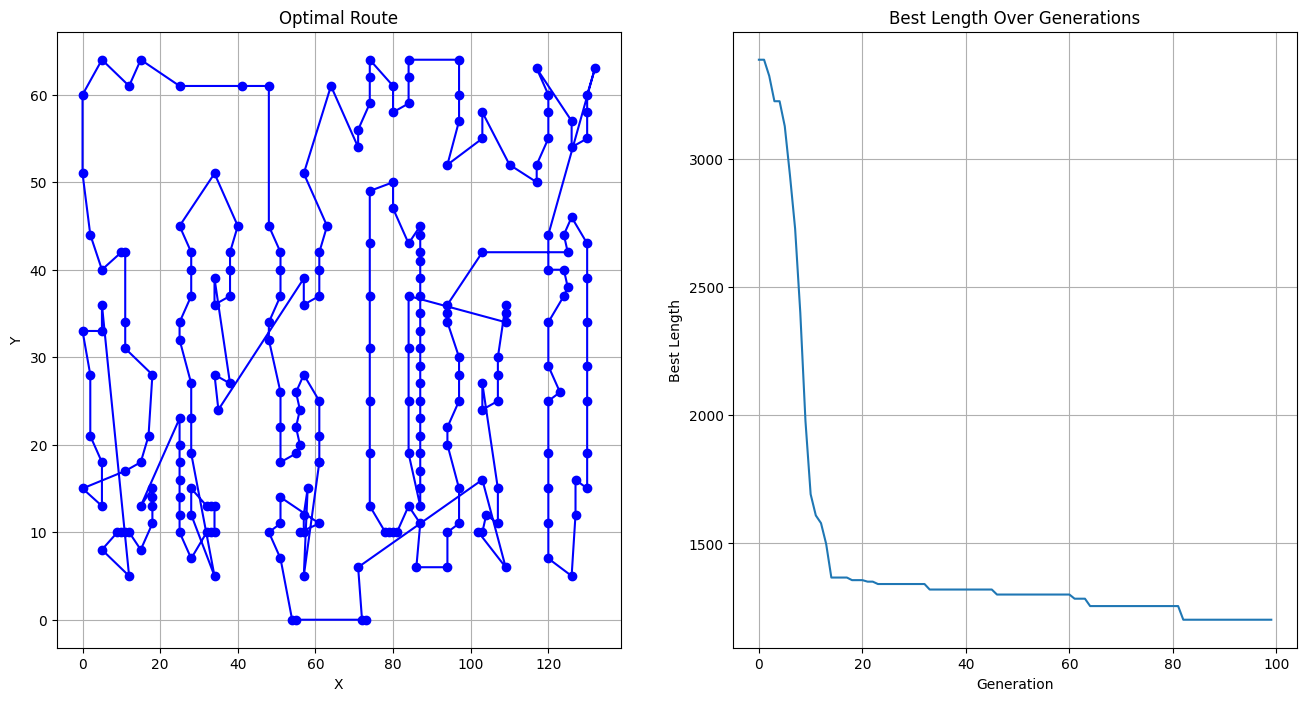

In [47]:
plot_route(coordinates1, best_route_ant_main_237, best_lengths_ant_main_237)

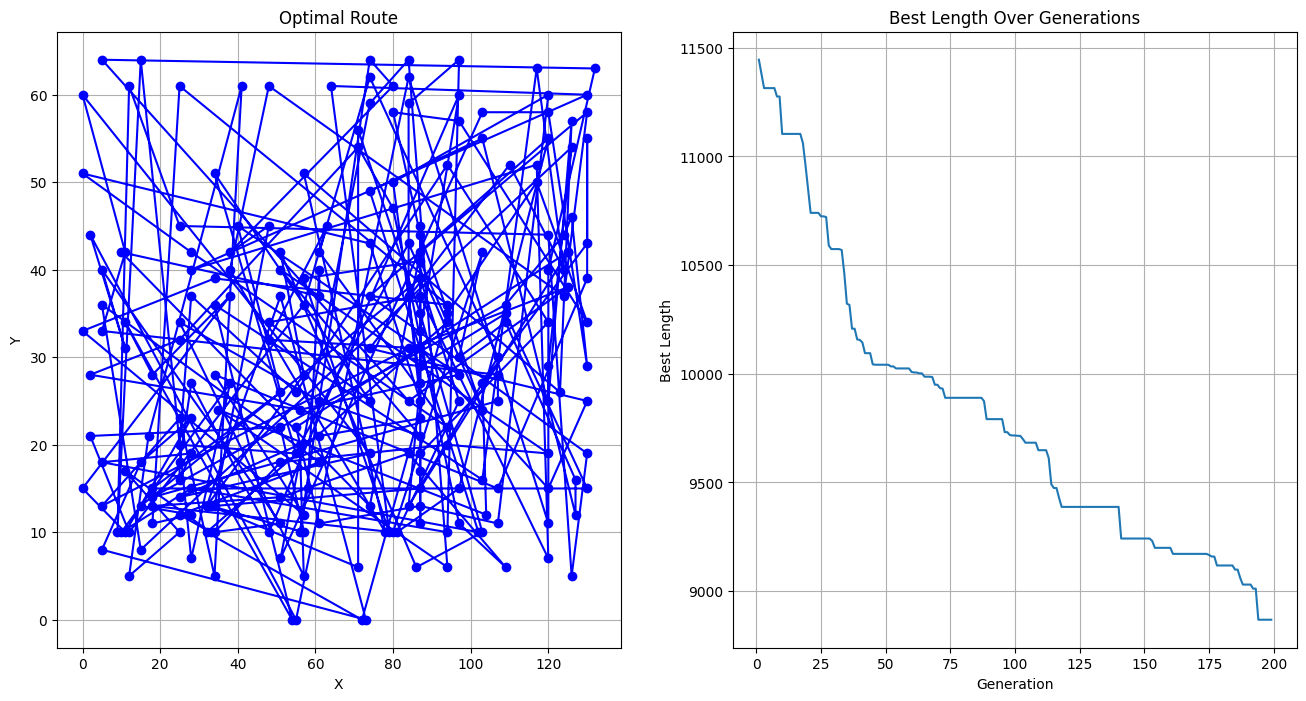

In [48]:
plot_route(coordinates1, best_route_gen_main_237, best_lengths_gen_main_237)

In [52]:
best_route_ant_main_411, best_length_ant_main_411, best_routes_ant_main_411, best_lengths_ant_main_411 = [], np.inf, [], []
best_route_gen_main_411, best_length_gen_main_411, best_routes_gen_main_411, best_lengths_gen_main_411 = [], np.inf, [], []

for _ in range(3):  
    ant_colony = AntColonyTSP(coordinates2, num_ants=30, generations=100, alpha=1.0, beta=2.0, evaporation=0.5, Q=4)
    genetic_tsp = GeneticTSP(coordinates2, pop_size=100, generations=500, mutation_rate=0.2)

    best_route_ant, best_length_ant, best_routes_ant, best_lengths_ant = ant_colony.optimize()
    best_route_gen, best_length_gen, best_routes_gen, best_lengths_gen = genetic_tsp.optimize()

    if best_length_ant < best_length_ant_main_411:
        best_route_ant_main_411, best_length_ant_main_411 = best_route_ant, best_length_ant
        best_routes_ant_main_411, best_lengths_ant_main_411 = best_routes_ant, best_lengths_ant


    if best_length_gen < best_length_gen_main_411:
        best_route_gen_main_411, best_length_gen_main_411 = best_route_gen, best_length_gen
        best_routes_gen_main_411, best_lengths_gen_main_411 = best_routes_gen, best_lengths_gen


Generation 1: Best Length = 5812.686514703102
Generation 2: Best Length = 5712.556755907559
Generation 3: Best Length = 5477.506305760213
Generation 4: Best Length = 5477.506305760213
Generation 5: Best Length = 5392.906104477916
Generation 6: Best Length = 5244.984484409424
Generation 7: Best Length = 4523.611705691514
Generation 8: Best Length = 4157.132777685058
Generation 9: Best Length = 3806.0131594755476
Generation 10: Best Length = 3403.354884144091
Generation 11: Best Length = 2776.5564854935246
Generation 12: Best Length = 2336.6774972056714
Generation 13: Best Length = 2299.8939389238167
Generation 14: Best Length = 2199.3742014122363
Generation 15: Best Length = 2031.0515482665216
Generation 16: Best Length = 2031.0515482665216
Generation 17: Best Length = 1953.1060184445344
Generation 18: Best Length = 1953.1060184445344
Generation 19: Best Length = 1953.1060184445344
Generation 20: Best Length = 1953.1060184445344
Generation 21: Best Length = 1949.6865143281761
Generation

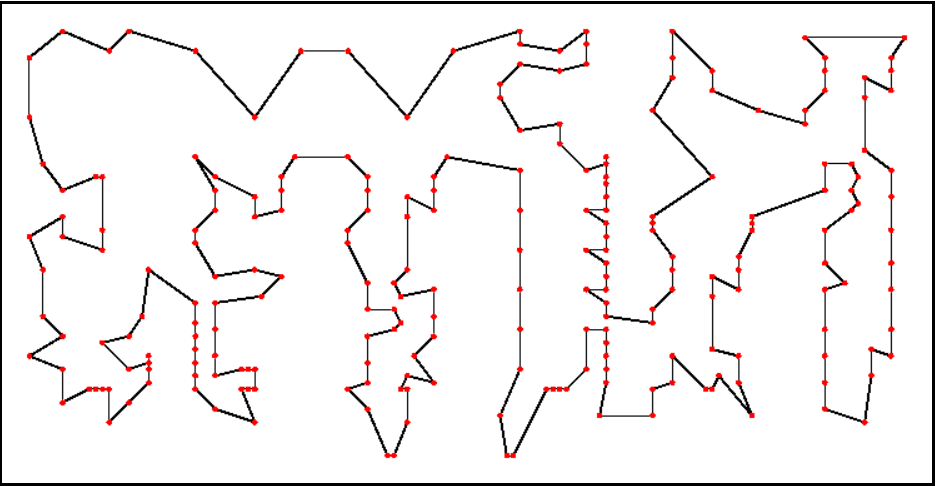

This is a tour for the XQG237 VLSI instance. It has length 1019

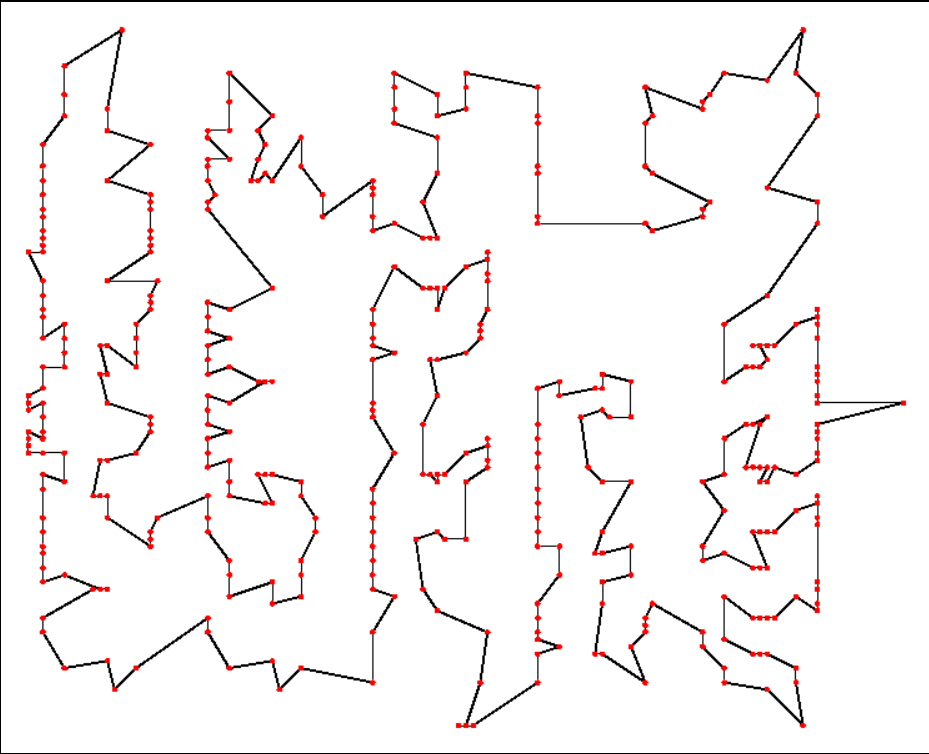

This is a tour for the PBK411 VLSI instance. It has length 1343.

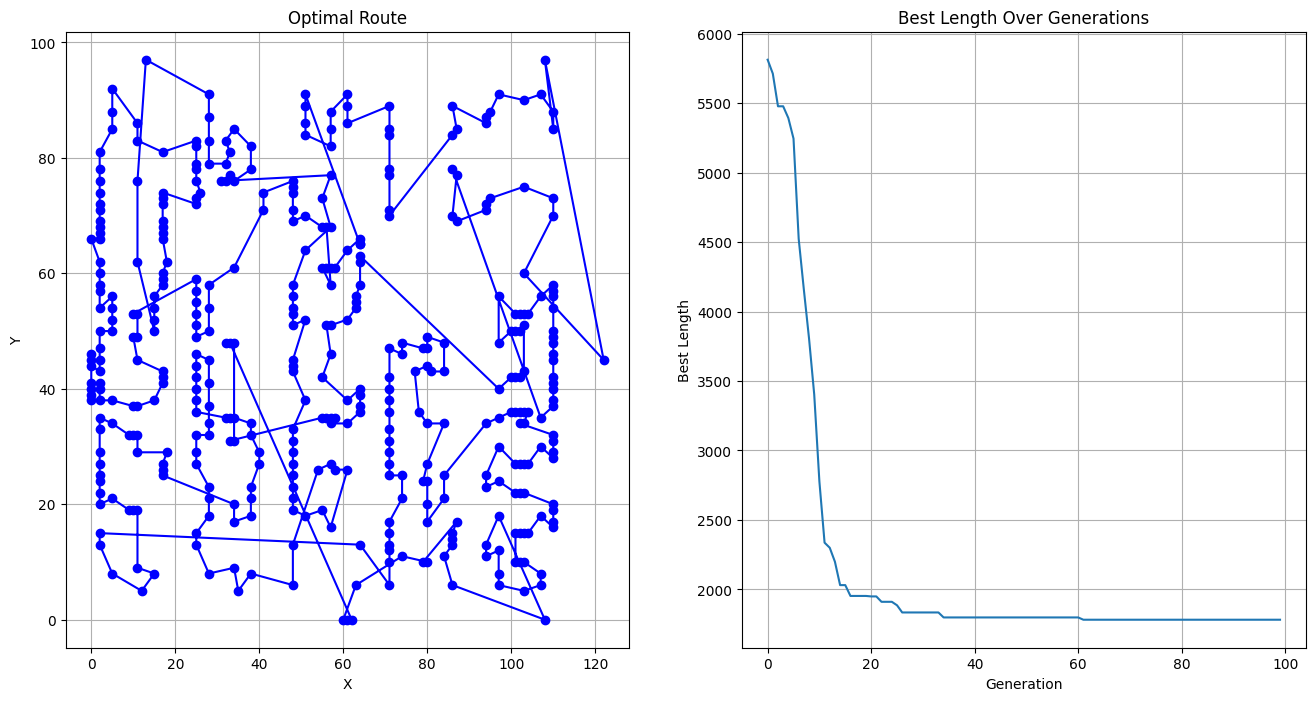

In [53]:
plot_route(coordinates2, best_route_ant_main_411, best_lengths_ant_main_411)

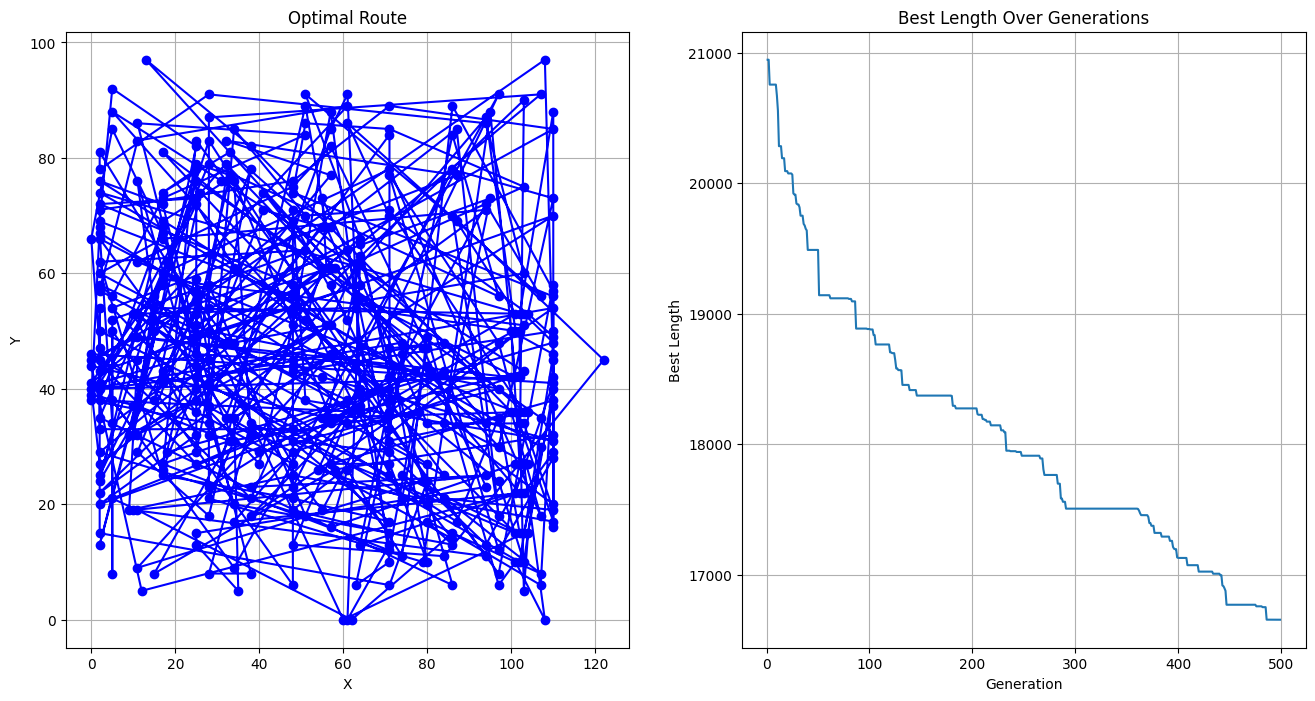

In [54]:
plot_route(coordinates2, best_route_gen_main_411, best_lengths_gen_main_411)

# Створення гіфок

In [73]:
def create_gif_from_routes(points, best_routes, best_lengths, filename):
    """
    Створює GIF-анімацію процесу оптимізації маршруту TSP з графіком збіжності.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    def update(frame):
        ax1.clear()
        ax2.clear()
        
        # Маршрут оптимізації
        route = best_routes[frame]
        length = best_lengths[frame]
        ordered_points = [points[i] for i in route] + [points[route[0]]]
        x, y = zip(*ordered_points)
        ax1.plot(x, y, marker='o', linestyle='-', color='blue', label=f'Iteration: {frame+1}\nLength: {length:.2f}')
        ax1.set_title("TSP Route" + filename)
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        ax1.legend(loc='upper right')
        ax1.grid(True)

        # Графік збіжності
        ax2.plot(best_lengths[:frame+1], marker='o', linestyle='-', color='green')
        ax2.set_title("Convergence Plot")
        ax2.set_xlabel("Iteration")
        ax2.set_ylabel("Route Length")
        ax2.grid(True)

    ani = FuncAnimation(fig, update, frames=len(best_routes), interval=100)
    ani.save('gifs/'+filename+'.gif', writer='pillow')
    plt.close(fig)

In [56]:
create_gif_from_routes(coordinates1, best_routes_ant_main_237, best_lengths_ant_main_237, "xqg237_ants")

In [57]:
create_gif_from_routes(coordinates2, best_routes_ant_main_411, best_lengths_ant_main_411, "pbk411_ants")

In [74]:
x = 30
method = "ant"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, ant_colony_results[x][2], ant_colony_results[x][3], name)

In [75]:
x = 50
method = "ant"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, ant_colony_results[x][2], ant_colony_results[x][3], name)

In [76]:
x = 100
method = "ant"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, ant_colony_results[x][2], ant_colony_results[x][3], name)

In [77]:
x = 200
method = "ant"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, ant_colony_results[x][2], ant_colony_results[x][3], name)

In [78]:
x = 30
method = "genetic"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, genetic_tsp_results[x][2], genetic_tsp_results[x][3], name)

In [79]:
x = 50
method = "genetic"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, genetic_tsp_results[x][2], genetic_tsp_results[x][3], name)

In [80]:
x = 100
method = "genetic"
name = f"circle_{x}_{method}"
points = generate_circle(x)
# create_gif_from_routes(points, genetic_tsp_results[x][2], genetic_tsp_results[x][3], name)
create_gif_from_routes(points, best_routes_gen_exp, best_lengths_gen_exp, name)

In [81]:
x = 200
method = "genetic"
name = f"circle_{x}_{method}"
points = generate_circle(x)
create_gif_from_routes(points, genetic_tsp_results[x][2], genetic_tsp_results[x][3], name)